In [43]:
from scipy.integrate import *
from pandas import *
from numpy import *
from pylab import *
from scipy import *
import math
from scipy.interpolate import InterpolatedUnivariateSpline

In [44]:
# time change (discrete time)
T = 360.0 
delt = 1.0/240.0
t = np.linspace(0, T, int(T/delt)) #time array
#t = np.linspace(0,T,int(T/dt))
#print(t)

# array  to store  the  solution
N = np.zeros(len(t))
P1 = np.zeros(len(t))
P2 = np.zeros(len(t))
N[0] = 100
P1[0] = 50
P2[0] = 50
y0 = np.array([N[0], P1[0], P2[0]]) #create an array with your starting values for odeint
print(y0)

[100.  50.  50.]


In [45]:
zetas = np.linspace(0,50,50)
k = 0.04
#S_r = 5
mu_max1 = 0.05
mu_max2 = 0.01
print(len(zetas))

50


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  """Entry point for launching an IPython kernel.


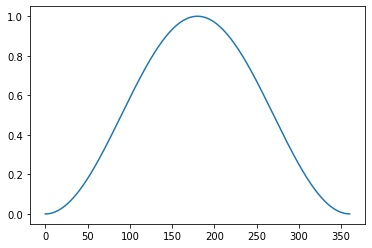

In [46]:
I_naughts = (sin(((t)/T*2*math.pi-math.pi/2))+1)/2
#alpha_knots = ones(int(T/delt))
plt.plot(t,I_naughts)

In [47]:
Is = []
for I_naught in I_naughts:
    I = I_naught * np.exp(-k*zetas)
    Is.append(I)
light_att = array(Is)
lights = light_att.T

print(light_att.shape)
print(zetas.shape)
print(I_naughts.shape)
print(lights.shape)

(86400, 50)
(50,)
(86400,)
(50, 86400)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  """


In [48]:
print(lights.shape)

(50, 86400)


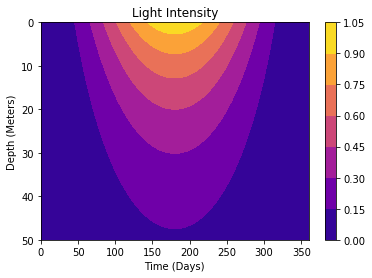

In [49]:
plt.contourf(t,zetas,lights,cmap = 'plasma')
plt.gca().invert_yaxis()
plt.xlabel('Time (Days)', color = 'k')
plt.ylabel('Depth (Meters)', color = 'k')
plt.title('Light Intensity')
plt.colorbar()
plt.savefig('light_cycle_variable')

In [50]:
I_naughts_interp = InterpolatedUnivariateSpline(t, I_naughts)

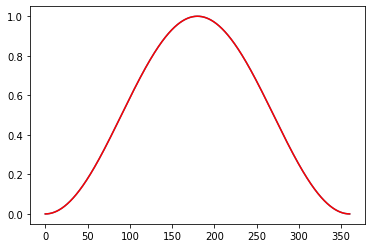

In [51]:
plt.plot(t, I_naughts)
plt.plot(t, I_naughts_interp(t), 'r')

In [52]:
def nbl_model(y, t, zeta, delta, mu_max1, mu_max2, alpha):
    N, P1, P2 = y[0], y[1], y[2]
    I_naught = I_naughts_interp(t)
    if I_naught < 0:
        I_naught = 0.
    I = I_naught * np.exp(-k*zeta)
    dNdt = -mu_max1*min(N/(N+(mu_max1/alpha))*P1,N/(N+(mu_max1/alpha))*P1) - mu_max2*min(N/(N+(mu_max2/alpha))*P2,N/(N+(mu_max2/alpha))*P2) + delta*P1 + delta*P2
    dP1dt = mu_max1*min(N/(N+(mu_max1/alpha))*P1,N/(N+(mu_max1/alpha))*P1) - delta*P1
    dP2dt = mu_max2*min(N/(N+(mu_max2/alpha))*P2,N/(N+(mu_max2/alpha))*P2) - delta*P2
    return np.array([dNdt, dP1dt, dP2dt])

In [53]:
delta = 0.01
alpha = 1
tim = []
for zeta in zetas:
    integ_sivz = odeint(nbl_model, y0, t, args=(zeta, delta, mu_max1, mu_max2, alpha))
    tim.append(integ_sivz)
sols = array(tim)
print(sols)

[[[1.00000000e+02 5.00000000e+01 5.00000000e+01]
  [9.99916713e+01 5.00083289e+01 4.99999998e+01]
  [9.99833412e+01 5.00166592e+01 4.99999996e+01]
  ...
  [1.29455269e-02 1.87787947e+02 1.21991072e+01]
  [1.29455184e-02 1.87788169e+02 1.21988857e+01]
  [1.29455099e-02 1.87788390e+02 1.21986642e+01]]

 [[1.00000000e+02 5.00000000e+01 5.00000000e+01]
  [9.99916713e+01 5.00083289e+01 4.99999998e+01]
  [9.99833412e+01 5.00166592e+01 4.99999996e+01]
  ...
  [1.29455269e-02 1.87787947e+02 1.21991072e+01]
  [1.29455184e-02 1.87788169e+02 1.21988857e+01]
  [1.29455099e-02 1.87788390e+02 1.21986642e+01]]

 [[1.00000000e+02 5.00000000e+01 5.00000000e+01]
  [9.99916713e+01 5.00083289e+01 4.99999998e+01]
  [9.99833412e+01 5.00166592e+01 4.99999996e+01]
  ...
  [1.29455269e-02 1.87787947e+02 1.21991072e+01]
  [1.29455184e-02 1.87788169e+02 1.21988857e+01]
  [1.29455099e-02 1.87788390e+02 1.21986642e+01]]

 ...

 [[1.00000000e+02 5.00000000e+01 5.00000000e+01]
  [9.99916713e+01 5.00083289e+01 4.9999

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  import sys


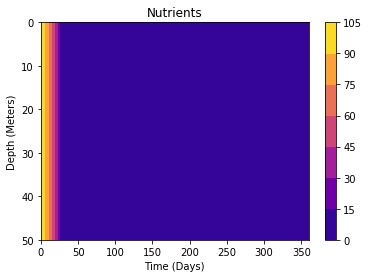

In [54]:
plt.contourf(t,zetas,sols[:,:,0],cmap = 'plasma')
plt.gca().invert_yaxis()
plt.xlabel('Time (Days)', color = 'k')
plt.ylabel('Depth (Meters)', color = 'k')
plt.title('Nutrients')
plt.colorbar()
plt.savefig('light_cycle_variable_np_nutrients')

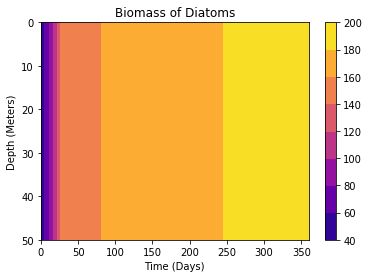

In [55]:
plt.contourf(t,zetas,sols[:,:,1],cmap = 'plasma')
plt.gca().invert_yaxis()
plt.xlabel('Time (Days)', color = 'k')
plt.ylabel('Depth (Meters)', color = 'k')
plt.title('Biomass of Diatoms')
plt.colorbar()
plt.savefig('light_cycle_variable_np_biomass')

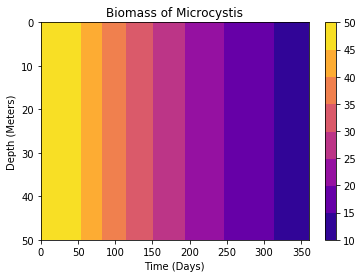

In [56]:
plt.contourf(t,zetas,sols[:,:,2],cmap = 'plasma')
plt.gca().invert_yaxis()
plt.xlabel('Time (Days)', color = 'k')
plt.ylabel('Depth (Meters)', color = 'k')
plt.title('Biomass of Microcystis')
plt.colorbar()
plt.savefig('light_cycle_variable_np_biomass')